<a href="https://colab.research.google.com/github/conradoov/formacao_machine_learning_alura/blob/main/machine_learning_modelo_multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 1 - Obtendo e tratamento inicial dos dados

In [1]:
#Obtendo dataset para desenvolvimento do modelo de classificacao
import pandas as pd

resultados_exames = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")
resultados_exames.head(5)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
valores_exames = resultados_exames.drop(columns=['id','diagnostico'], axis=1)
diagnostico = resultados_exames.diagnostico

#Removendo coluna com alto volume de valores vazios
valores_exames_v1 = valores_exames.drop(columns=['exame_33'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from numpy import random

seed = 123143
random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size=0.3)

In [4]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_x, treino_y)


print('Resultado da classificacao %.2f%%' %(classificador.score(teste_x, teste_y) * 100))

Resultado da classificacao 92.40%


In [5]:
from sklearn.dummy import DummyClassifier

seed = 123143
random.seed(seed)

classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(treino_x, treino_y)

print('Resultado da classificacao Dummy %.2f%%' %(classificador_dummy.score(teste_x, teste_y) * 100))

Resultado da classificacao Dummy 66.67%


## Aula 2 - Avançando e explorando os dados

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

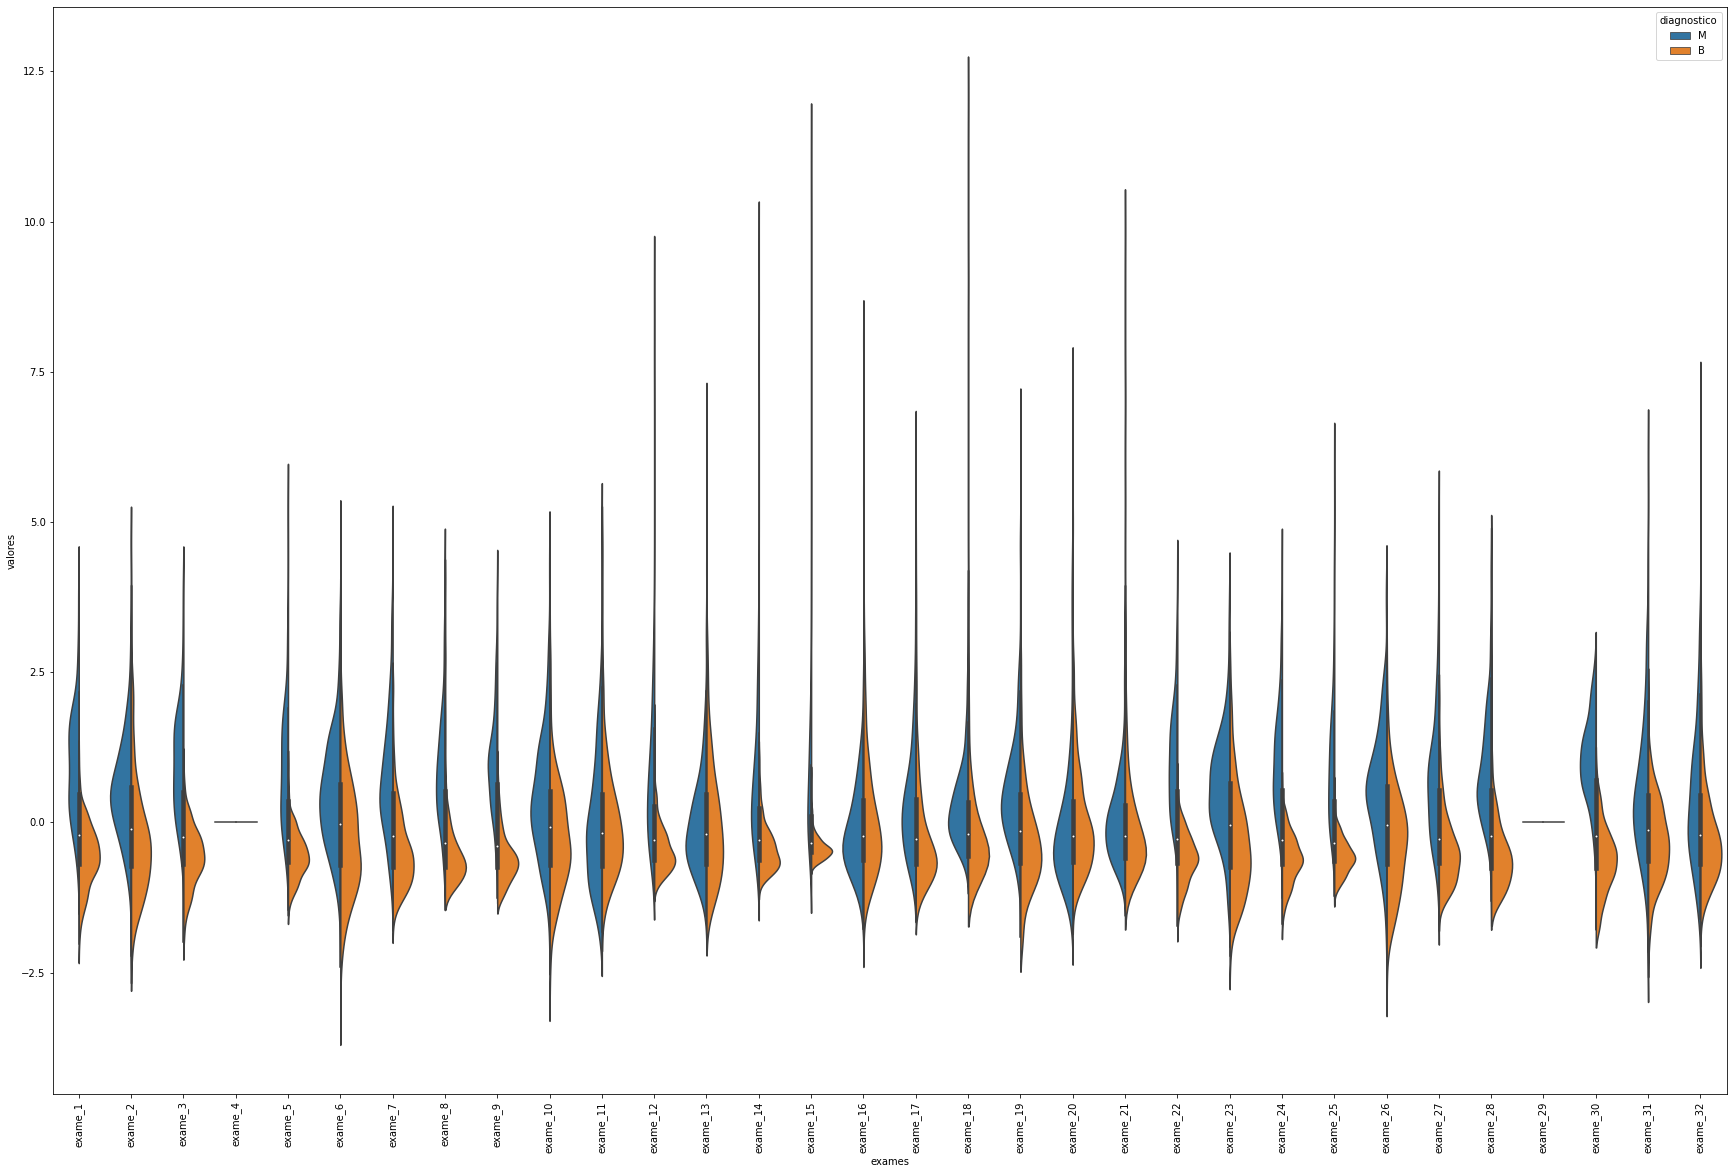

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, 
                                 columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2], axis=1)

dados_plot = pd.melt(dados_plot, 
                     id_vars="diagnostico",
                     var_name="exames",
                     value_name="valores")
plt.figure(figsize = (30,20))
sns.violinplot(x="exames",
               y="valores",
               hue="diagnostico",
               split = True,
               data=dados_plot)

plt.xticks(rotation=90)



* Exames com cristas de onda em diferentes posições no eixo Y são exames melhores para analisar os valores das classificações de câncer
* O exame 4 e exame 29 não agregam em nada na classificação, pois seus valores são constantes.

In [28]:
def grafico_violino(valores, inicio, fim):


  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio : fim]], axis=1)
  dados_plot = pd.melt(dados_plot, 
                      id_vars="diagnostico",
                      var_name="exames",
                      value_name="valores")
  plt.figure(figsize = (10,10))
  sns.violinplot(x="exames",
                y="valores",
                hue="diagnostico",
                split = True,
                data=dados_plot)
  plt.xticks(rotation=90)



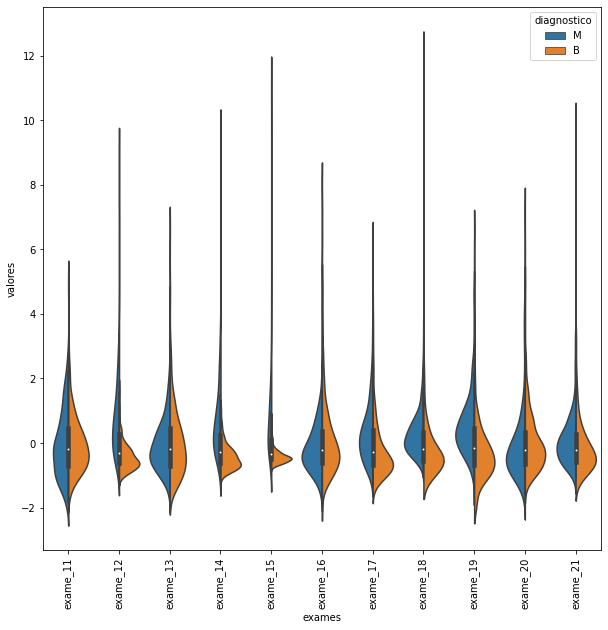

In [29]:
grafico_violino(valores_exames_v2, 10, 21)

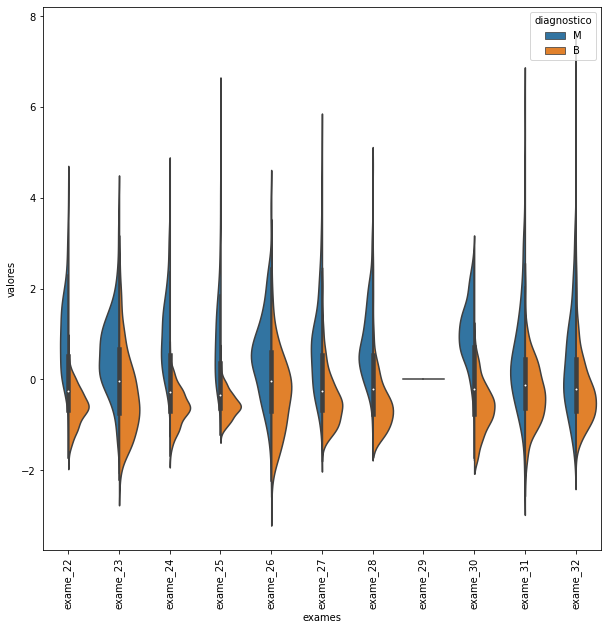

In [30]:
grafico_violino(valores_exames_v2, 21, 32)

In [33]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_4", "exame_29"], axis=1)

def classificar(valores):
  seed = 1234
  random.seed(seed)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                        diagnostico,
                                                        test_size=0.3)  
  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)
  print('Resultado da classificacao %.2f%%' %(classificador.score(teste_x, teste_y) * 100))

classificar(valores_exames_v3)

Resultado da classificacao 92.98%
